![image info](https://drive.google.com/uc?id=1AerT9299ijreLjEeIoGLv6SoT-SFC6-m)

# Inhaltsverzeichnis 

- **PCA - Hausaufgabe**
    - **1. Datensatz einlesen**
    - **2. Vorbereitung der Daten/Visualisierung**
    - **3. Principal Component Analysis**
    - **4. Visualisierung der beiden Komponenten**
    - **5. Klassifizierung und Evaluation auf den beiden neuen Komponenten**


# PCA - Hausaufgabe

In dieser Hausaufgabe arbeiten wir mit dem [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set)-Datensatz, welcher Informationen über drei verschiedene Pflanzenarten enthält. Deine Aufgabe ist es, die drei Arten richtig zu klassifizieren.

Die zusätzliche Herausforderung besteht diesmal allerdings darin, dass du vor dem Trainieren des Modells eine **P**rincipal **C**omponent **A**nalysis durchführen sollst. Diese soll die **4** Features im ursprünglichen Datensatz auf **2** Features reduzieren (*Dimensionsreduzierung*). Visualisiere dir anschließend die transformierten Daten und prüfe, ob du visuell bereits die unterschiedlichen Arten unterscheiden kannst. Führe dann eine Klassifizierung mit einer SVM durch. Interpretiere die Ergebnisse.

Die einzelnen Schritte:

- **Datensatz einlesen**
- **Vorbereitung der Daten/Visualisierung**
- **Principal Component Analysis**
- **Visualisierung der beiden Komponenten**
- **Klassifizierung und Evaluation auf den beiden neuen Komponenten**


## 1. Datensatz einlesen

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2. Vorbereitung der Daten/Visualisierung

- Lass dir einen [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) für den Datensatz darstellen.

- Ändere die 3 Namen der Klassen für die einfachere Handhabung in die Zahlen $0,1,2$ um.

> <span style="color:blue"> **_INFO:_** </span> Für die letzte Aufgabe könnte der Befehl [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) eines DataFrames nützlich sein. Damit kann man eine Funktion auf jedes Element einer Spalte anwenden.

d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

species
0    50
1    50
2    50
Name: count, dtype: int64

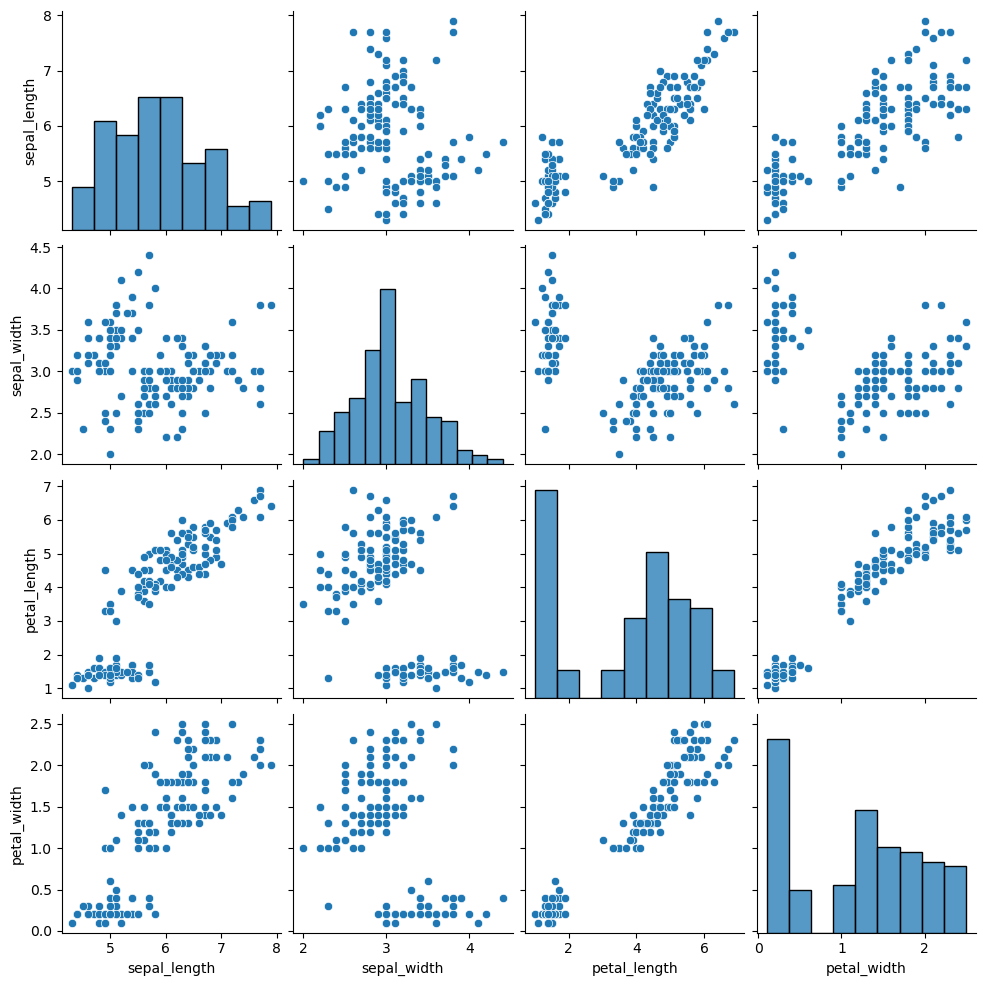

In [12]:
import pandas as pd

sns.pairplot(iris)

df = pd.DataFrame(iris)
species = {'setosa':0,'versicolor':1,'virginica':2}
df['species'] = df['species'].map(species)

df['species'].value_counts()

## 3. Principal Component Analysis

- Erstelle ein [PCA-Model](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) mit 2 Komponenten.
- Erstelle ein neues Dataframe `data` aus `iris`, _ohne_ die Spalte "species". `data` sollte daher die Dimensionen `(150,4)` haben.

- Transformiere den Datensatz in zwei Dimensionen. Verwende dazu die Funktionen [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit) und [`transform`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) des Modells. Was bedeutet das für die Daten?
- Speichere das Resultat von `transform` in einem neuen Variable `x_pca`. Diese sollte ein numpy-Array sein und aus $150$ Zeilen und $2$ (nicht mehr 4!) Features bestehen. **Die Dimensionalität wurde reduziert!**

In [24]:
from sklearn.decomposition import PCA

data = pd.DataFrame(iris.data,columns=iris.feature_names)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data)
x_pca.shape


(150, 2)

## 4. Visualisierung der beiden Komponenten

- Lass dir die transformierten Daten (`x_pca`, die nun 2-dimensional sind) in einem [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) darstellen.
- Lass dir in diesem Plot die Klasse farblich darstellen (`hue=iris['species']`). Kann man die Klassen visuell unterscheiden? Welche Klasse lässt sich leicht unterscheiden?

d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


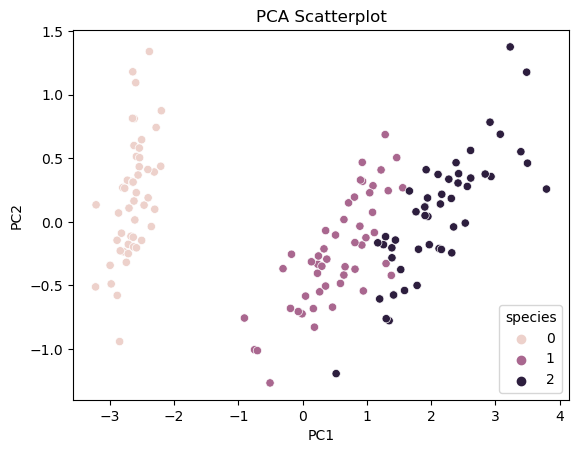

In [27]:
import matplotlib.pyplot as plt

x_pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
x_pca_df['species'] = iris.target

sns.scatterplot(data=x_pca_df, x='PC1', y='PC2', hue='species')
plt.title('PCA Scatterplot')
plt.show()

## Ja kann man in der Tat!

## 5. Klassifizierung und Evaluation auf den beiden neuen Komponenten

- Verwende nun eine [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) um auf den transformierten zweidimensionalen Daten (`x_pca`) einen Klassifikator zu trainieren. Vergiss den [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) nicht! 

- Probiere für das optimale Ergebnis verschiedene Werte für C und gamma aus. 

- Lass dir nach dem Training für die Testdaten die [Confusion-Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) anzeigen.

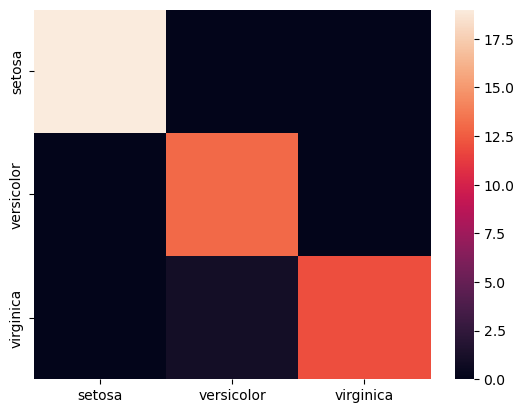

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x_pca, iris.target, test_size=0.3, random_state=42)


svm_classifier = SVC() 
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.show()